In [27]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import nltk
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [28]:
# Load conversations from a text file
file_path = "outputFinal.txt"
faqs = []
with open(file_path, "r", encoding="utf-8") as file:
    qa_text = file.read()
    qa_pairs = qa_text.split("<Q>")
    for pair in qa_pairs[1:]:
        if pair.strip():
            q, rest = pair.split("</Q>", 1)
            a = rest.split("<A>")[1].split("</A>")[0]
            faqs.append((q.strip(), a.strip()))

In [29]:
ques_data = [q for q, _ in faqs]
ans_data = [a for _, a in faqs]


In [30]:
nltk.download('punkt')
ques_tokenized=[]
for question in ques_data:
    tokenized=word_tokenize(question)
    ques_tokenized.append(tokenized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
ques_lemmatized=[]
for i in range(len(ques_tokenized)):
        tokens = ques_tokenized[i]
        pos_tags = nltk.pos_tag(tokens)
        lemmas = []
        for k in range(len(pos_tags)):
            tag = pos_tags[k][1][0].lower() if pos_tags[k][1][0].lower() in ['a', 'n', 'v'] else 'n'
            lemmas.append(lemmatizer.lemmatize(pos_tags[k][0], tag))
        ques_lemmatized.append(lemmas)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
ques_lemmatized_arr=[]
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join (w)for w in ques_lemmatized])
ques_lemmatized_arr = tokenizer.texts_to_sequences([' '.join (w)for w in ques_lemmatized])

In [33]:
vocab_size = len(tokenizer.word_index)
label_encoder=LabelEncoder()
ans_data_label=label_encoder.fit_transform(ans_data)
ans_data_label_encoded=to_categorical(ans_data_label,num_classes=vocab_size)

In [34]:
ques_pad_sequences = pad_sequences(ques_lemmatized_arr, maxlen=20)


In [35]:

kerasModel = keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size + 1, output_dim=32,input_length=20),
        tf.keras.layers.GRU(128, activation='relu'),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(vocab_size,activation='softmax') ,
        ])

In [36]:
kerasModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
history=kerasModel.fit(ques_pad_sequences,ans_data_label_encoded,epochs=200)

Epoch 1/200
3/3 [==============================] - 12s 53ms/step - loss: 5.3939 - accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 46ms/step - loss: 5.3894 - accuracy: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 56ms/step - loss: 5.3841 - accuracy: 0.0110
Epoch 4/200
3/3 [==============================] - 0s 83ms/step - loss: 5.3772 - accuracy: 0.0110
Epoch 5/200
3/3 [==============================] - 0s 71ms/step - loss: 5.3681 - accuracy: 0.0110
Epoch 6/200
3/3 [==============================] - 0s 81ms/step - loss: 5.3507 - accuracy: 0.0110
Epoch 7/200
3/3 [==============================] - 0s 74ms/step - loss: 5.3193 - accuracy: 0.0110
Epoch 8/200
3/3 [==============================] - 0s 48ms/step - loss: 5.2534 - accuracy: 0.0110
Epoch 9/200
3/3 [==============================] - 0s 50ms/step - loss: 5.1330 - accuracy: 0.0110
Epoch 10/200
3/3 [==============================] - 0s 49ms/step - loss: 5.0542 - accuracy: 0.0110
Epoch 11/2

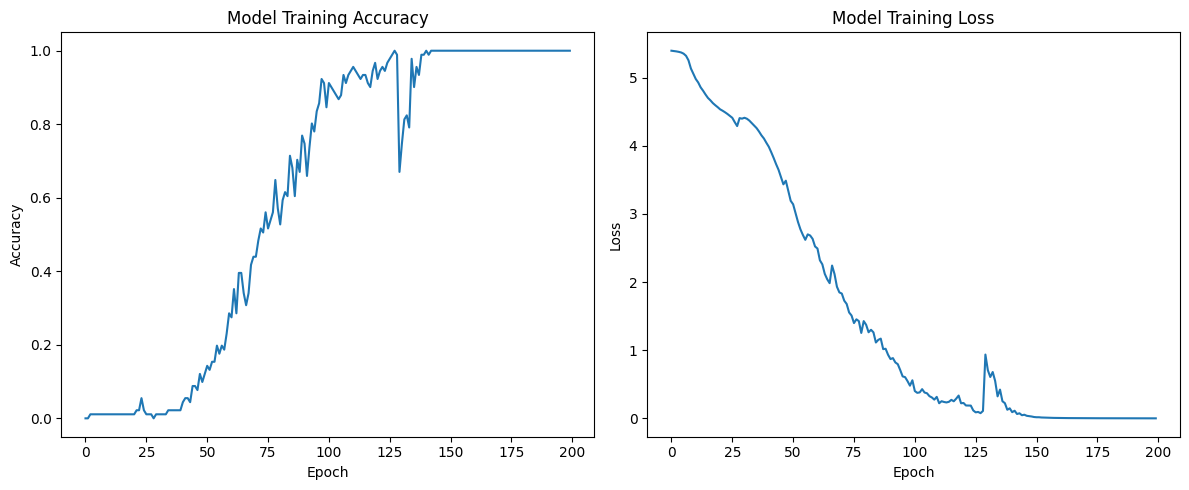

In [38]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

fig = plt.gcf()
fig.set_size_inches(12, 5)

plt.tight_layout()
plt.show()

In [24]:
val_loss, val_acc = kerasModel.evaluate(ques_pad_sequences, ans_data_label_encoded)
print(f"{val_loss:.3f}")
print(f"{val_acc:.3f}")

3/3 [==============================] - 0s 12ms/step - loss: 0.0018 - accuracy: 1.0000
0.002
1.000


In [25]:
def preprocess_input(input_text):
    input_text = input_text.lower()
    input_text = nltk.word_tokenize(input_text)
    input_text = [lemmatizer.lemmatize(word) for word in input_text]
    input_text = tokenizer.texts_to_sequences([input_text])
    input_text = tf.keras.preprocessing.sequence.pad_sequences(input_text, maxlen=20)
    return input_text



In [26]:
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    preprocessed_input = preprocess_input(user_input)
    prediction = kerasModel.predict(preprocessed_input)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    print("Chatbot: " + predicted_label[0])

You: what is depression
1/1 [==============================] - 0s 243ms/step
Chatbot: clinical depression is a serious condition that negatively affects how a person thinks  feels  and behaves  in contrast to normal sadness  clinical depression is persistent  often interferes with a person’s ability to experience or anticipate pleasure  and significantly interferes with functioning in daily life  untreated  symptoms can last for weeks  months  or years  and if inadequately treated  depression can lead to significant impairment  other health related issues  and in rare cases  suicide
You: what are the symptoms of clinical depression
1/1 [==============================] - 0s 23ms/step
Chatbot: the symptoms of depression can be complex and vary widely between people  if you re depressed  you may feel sad  hopeless and lose interest in things you used to enjoy 

the symptoms persist for weeks or months and are bad enough to interfere with your work  social life and family life 

there are 